# Salary Prediction

# About Dataset

This dataset has total of 6704 rows and 6 columns
1) Age - Age of the employee
2) Gender - Gender of the employee
3) Education Level - Education level of employee
4) Job Title - Job title of the employee
5) Years of Experience - experience of the employee
6) Salary - Salary of the employee

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
# read a csv file
salary_df = pd.read_csv('Salary Data.csv')
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# get a quick info about dataset 
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


# Data preprocessing Part 1

In [4]:
# detecting the null values
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [5]:
# drop the null values
salary_df.dropna(inplace = True)

In [6]:
# description of data
salary_df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [7]:
# checking the unique values of job title
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [8]:
# checking the value counts 
salary_df['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [9]:
# creating the variable for reducing the number of job titles
job_title_stats = salary_df['Job Title'].value_counts()
job_title_stats_less_than_50 = job_title_stats[job_title_stats<=50]
job_title_stats_less_than_50.count()

174

In [10]:
# reducing the number of job titles
salary_df['Job Title'] = salary_df['Job Title'].apply(lambda x: 'Others' if x in 'Job Title' else 0)
salary_df['Job Title'].nunique()

1

In [11]:
# checking unique values in education level 
salary_df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [12]:
salary_df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"])

0      Bachelor's
1        Master's
2             PhD
3      Bachelor's
4        Master's
          ...    
370    Bachelor's
371      Master's
372    Bachelor's
373    Bachelor's
374           PhD
Name: Education Level, Length: 373, dtype: object

In [13]:
salary_df.Gender.value_counts()
# three genders present in this dataset

Male      194
Female    179
Name: Gender, dtype: int64

# Exploratory data analysis

In [14]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,0,5.0,90000.0
1,28.0,Female,Master's,0,3.0,65000.0
2,45.0,Male,PhD,0,15.0,150000.0
3,36.0,Female,Bachelor's,0,7.0,60000.0
4,52.0,Male,Master's,0,20.0,200000.0


# Distribution of catogorical variables

<Axes: xlabel='Education Level', ylabel='count'>

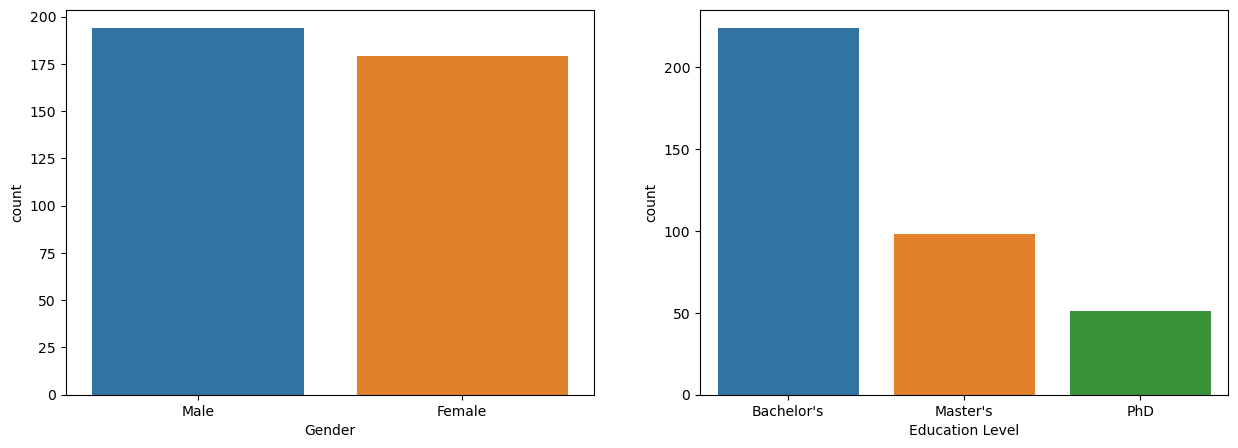

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',data=salary_df,ax = ax[0])
sns.countplot(x='Education Level',data = salary_df,ax=ax[1])

The first chart reveals that a significant portion of the employees are males, while the
second chart indicates that the majority of employees have completed a bachelor's degree.

# Distribution of Continuous variables

<Axes: xlabel='Salary', ylabel='Count'>

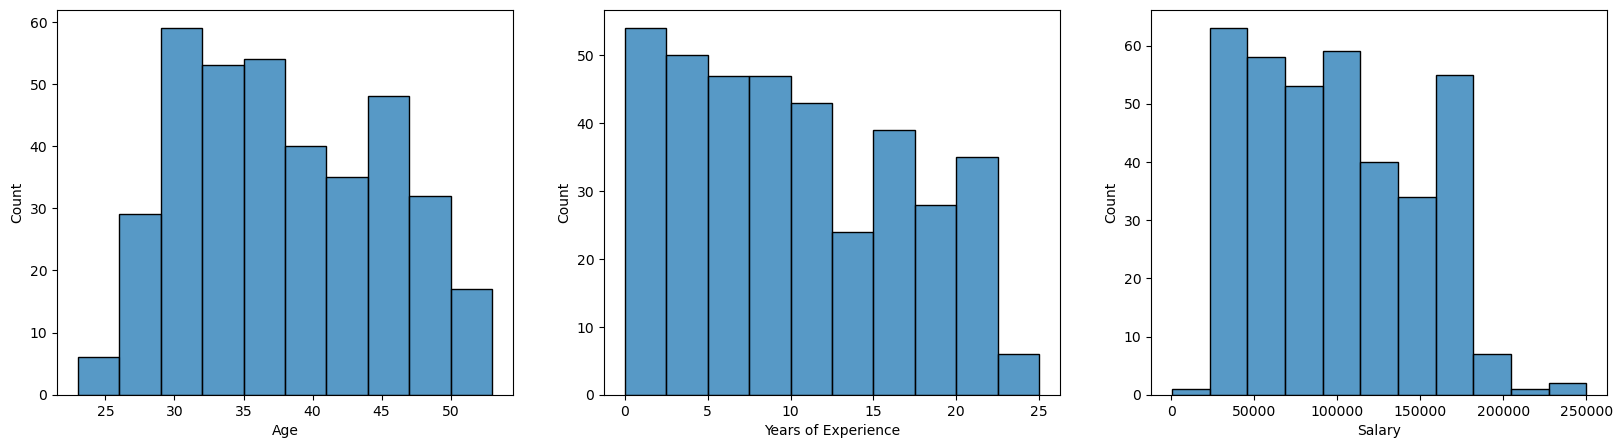

In [16]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(salary_df['Age'],ax=ax[0])
sns.histplot(salary_df['Years of Experience'],ax=ax[1])
sns.histplot(salary_df['Salary'],ax=ax[2])

Chart 1 highlights that the majority of employees fall within the 23 to 37 years age range,
emphasizing a youthful workforce.
The second chart illustrates employees experience levels with the majority having 1 to 10
years of experience.
The third chart demontrates the salary distribution with most employees earning salaries
between 50,000 to 2,00,000.

# Top 10 Highest paid jobs

[Text(0.5, 1.0, 'Top 10 Highest Paid Jobs')]

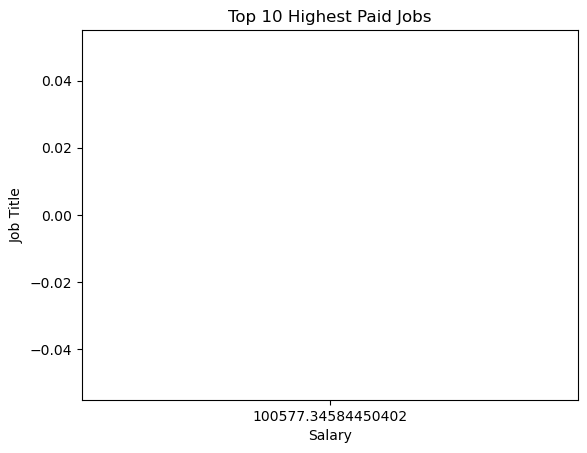

In [17]:
mean_salary_by_job = salary_df.groupby('Job Title')['Salary'].mean().reset_index()
sorted_data = mean_salary_by_job.sort_values(by='Salary',ascending=False)
sns.barplot(x='Salary',y='Job Title',data=sorted_data.head(10)).set(title='Top 10 Highest Paid Jobs')

Based on this chart we can know Director of data science gets a highest mean salary

# Relationship with Target variable

[Text(0.5, 1.0, 'Relationship between Education level and Salary')]

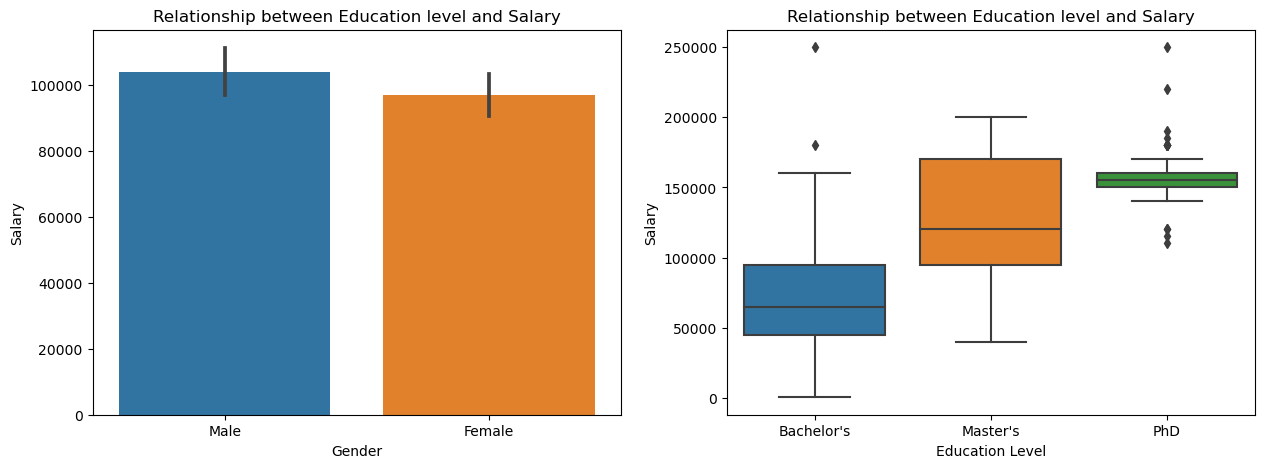

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Gender',y='Salary',data=salary_df,ax=ax[0]).set(title='Relationship between Education level and Salary')
sns.boxplot(x='Education Level',y='Salary',data=salary_df,ax=ax[1]).set(title='Relationship between Education level and Salary')

In chart 1 demonstrates the salary distribution among the genders. Employees from the
other genders get a high salary as compared to the other two genders, but they are very
less in count.
Through chart second we can ascertain PhD holders have a high median salary

[Text(0.5, 1.0, 'Education level vs Salary vs Gender')]

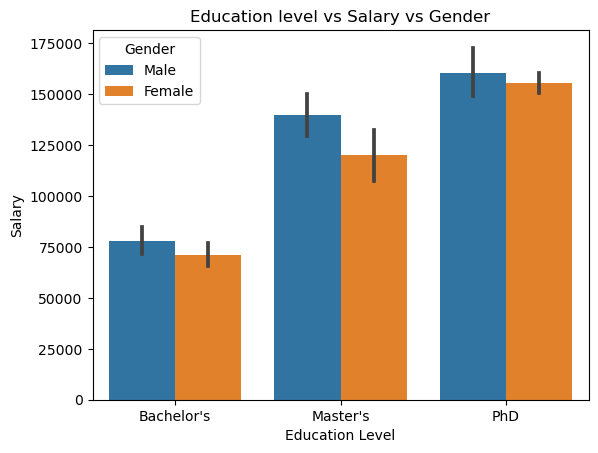

In [19]:
sns.barplot(x='Education Level',y='Salary',data=salary_df,hue='Gender').set(title= 'Education level vs Salary vs Gender')

This chart shows education level and salary among the genders. In all education level
catogory male gets high salary than female. In Master's and High School catogory other
gender gets a high salary than males and females.

[Text(0.5, 1.0, 'Relationship between Age and Salary')]

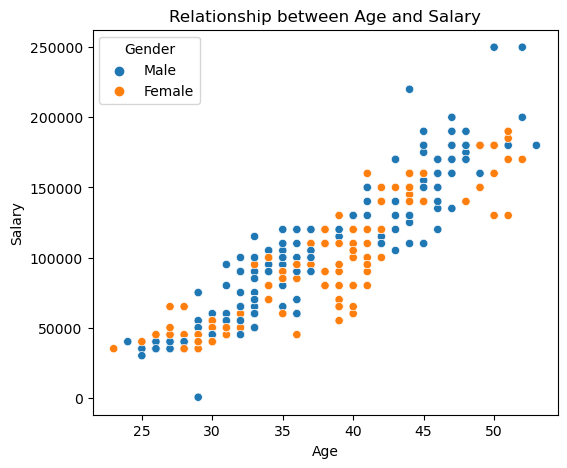

In [20]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Age and Salary')

This chart shows relationship between age and salary of employees. It illustrates that as age
increases salary also increses. Gender distribution are also equal.

[Text(0.5, 1.0, 'Relationship between Experience and Salary')]

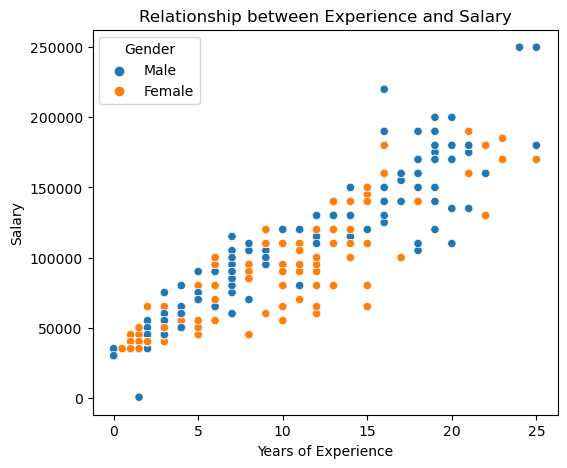

In [21]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Years of Experience',y='Salary',data=salary_df,hue='Gender').set(title='Relationship between Experience and Salary')

This chart shows relationship between experience and salary of employees. It illustrates that
as experience increases salary also increses. Gender distribution are also same.

# Data Preprocessing Part 2

# Detecting the Outliers

In [22]:
# detecting the outliers in salary column using IQR method
Q1 = salary_df.Salary.quantile(0.25)
Q3 = salary_df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [23]:
salary_df[salary_df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [24]:
salary_df[salary_df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


No outliers found in Salary column

In [25]:
# Mapping Education Level column
education_mapping = {"High School":0,"Bachelor's":1,"Master's":2,"PhD":3}
salary_df['Education Level'] = salary_df['Education Level'].map(education_mapping)

In [26]:
# Label encoding the catogorical variable
le = LabelEncoder()
salary_df['Gender'] = le.fit_transform(salary_df['Gender'])

<Axes: >

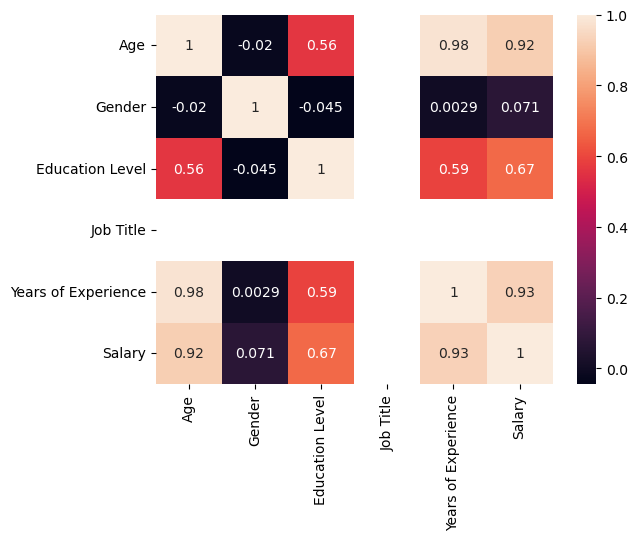

In [27]:
# Correlation plot
sns.heatmap(salary_df.corr(),annot = True)

Through this heatmap we can know age, education level, expereince are highly correlated to
the salary.

In [28]:
# Creating dummies for Job titles
dummies = pd.get_dummies(salary_df['Job Title'],drop_first=True)
salary_df = pd.concat([salary_df,dummies],axis=1)

In [29]:
# Drop Job Title column
salary_df.drop('Job Title',inplace=True,axis=1)
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,1,5.0,90000.0
1,28.0,0,2,3.0,65000.0
2,45.0,1,3,15.0,150000.0
3,36.0,0,1,7.0,60000.0
4,52.0,1,2,20.0,200000.0


In [30]:
# Separate the dataset into features and target
features = salary_df.drop('Salary',axis=1)
target = salary_df['Salary']

# Train Test Split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=42)
x_train.shape

(279, 4)

# Salary Prediction

In [32]:
# Create a dictionary for hyperparameter tuning
model_params = {
 'Linear_Regression':{
 'model':LinearRegression(),
 'params':{
 
 }
 },
 'Decision_Tree':{
 'model':DecisionTreeRegressor(),
 'params':{
 'max_depth':[2,4,6,8,10],
 'random_state':[0,42],
 'min_samples_split':[1,5,10,20]
 }
 },
 'Random_Forest':{
 'model':RandomForestRegressor(),
 'params':{
 'n_estimators':[10,30,20,50,80]
 }
 }
}

In [33]:
# Hyper parameter tuning through grid search cv
score=[]
for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5,scoring='neg_mean_squared_error')
    clf.fit(x_train,y_train)
 
    score.append({
         'Model':model_name,
         'Params':clf.best_params_,
         'MSE(-ve)':clf.best_score_
 })
pd.DataFrame(score)

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-2.451470e+08
1,Decision_Tree,"{'max_depth': 6, 'min_samples_split': 10, 'ran...",-2.801172e+08
2,Random_Forest,{'n_estimators': 50},-2.736480e+08


Random Forest model has a lowest neagtive mean squared error which corresponds to the
highest positive value of MSE.

In [34]:

# Order of the best models 
s = pd.DataFrame(score)
sort = s.sort_values(by = 'MSE(-ve)',ascending=False)
sort

,Model,Params,MSE(-ve)
0,Linear_Regression,{},-2.451470e+08
2,Random_Forest,{'n_estimators': 50},-2.736480e+08
1,Decision_Tree,"{'max_depth': 6, 'min_samples_split': 10, 'ran...",-2.801172e+08


# Model Evaluation

# Random Forest

In [35]:
# Random Forest model
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [36]:
rfr.score(x_test,y_test)

0.871123731940489

In [37]:
y_pred_rfr = rfr.predict(x_test)

In [38]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_rfr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_rfr,squared=False))

Mean Squared Error : 281034057.2805535
Mean Absolute Error : 11165.086464953485
Root Mean Squared Error : 16764.07042697428


# Decision Tree

In [39]:
# Decision Tree model
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=1.0, random_state=0)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=1.0, random_state=0)

In [40]:
dtr.score(x_test,y_test)

0.5885964505252659

In [41]:
y_pred_dtr = dtr.predict(x_test)

In [42]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_dtr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_dtr,squared=False))

Mean Squared Error : 897127224.6579683
Mean Absolute Error : 25241.174372994166
Root Mean Squared Error : 29952.08214228133


# Linear Regression

In [43]:
# Linear regression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.score(x_test,y_test)

0.8884452006674839

In [45]:
y_pred_lr = lr.predict(x_test)

In [46]:
print("Mean Squared Error :",mean_squared_error(y_test,y_pred_lr))
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_lr))
print("Root Mean Squared Error :",mean_squared_error(y_test,y_pred_lr,squared=False))

Mean Squared Error : 243261993.3645054
Mean Absolute Error : 10956.038360784267
Root Mean Squared Error : 15596.858445357046


# Conclusion